https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6

https://towardsdatascience.com/applied-deep-learning-part-2-real-world-case-studies-1bb4b142a585#cf02

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification

In [6]:
import matplotlib.pyplot as plt

In [4]:
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()

<b>Linearly Separable Data</b>
First let's start with the easy example. 2 dimensional linearly separable data. We are using the scikit-learn make_classification method to generate our data and use our helper function defined above to visualize it.

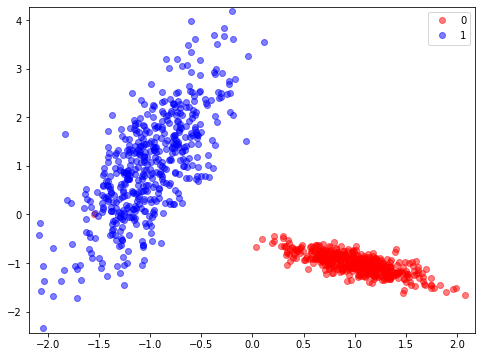

In [7]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=7, n_clusters_per_class=1)
plot_data(X, y)

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

* Despite its name, logistic regression (LR) is a binary classification algorithm. 
* It’s the most popular technique for 0/1 classification. 
* On a 2 dimensional (2D) data LR will try to draw a straight line to separate the classes, that’s where the term linear model comes from. LR works with any number of dimensions though, not just two. 
* For 3D data it’ll try to draw a 2D plane to separate the classes. 
* This generalizes to N dimensional data and N-1 dimensional hyperplane separator. 
* If you have a supervised binary classification problem, given an input data with multiple columns and a binary 0/1 outcome, LR is the first method to try. 
* In this section we will focus on 2D data since it’s easier to visualize.

In [14]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
print('LR coefficients:', lr.coef_)
print('LR intercept:', lr.intercept_)

LR coefficients: [[-4.07231906  2.09044633]]
LR intercept: [-0.23103502]


In [18]:
import numpy as np

How to train an LR model, using the fit function just like any other model in scikit-learn. We see the linear decision boundary as the green line.

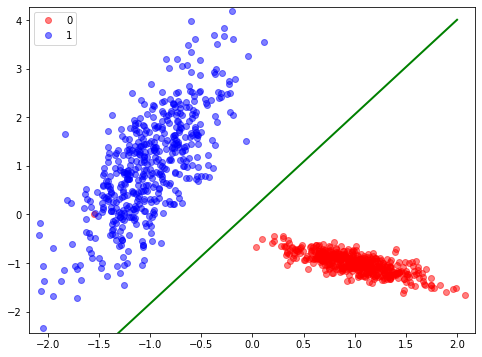

In [19]:
plot_data(X, y)
limits = np.array([-2, 2])
boundary = -(lr.coef_[0][0] * limits + lr.intercept_[0]) / lr.coef_[0][1]
plt.plot(limits, boundary, "g-", linewidth=2)

* As we can see the data is linearly separable. 
* We will now train the same logistic regression model with Keras to predict the class membership of every input point. 
* To keep things simple for now, we won’t perform the standard practices of separating out the data to training and test sets, or performing k-fold cross-validation.

### Artificial Neural Networks

Keras has great documentation, check it out [https://keras.io/] for a more detailed description of its API. Here’s the code for training the model, let’s go over it step by step below.

In [21]:
from keras.models import Sequential

Using TensorFlow backend.


In [23]:
from keras.layers import Dense

In [27]:
import pandas as pd

In [29]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

KeyError: 'acc'

<Figure size 576x432 with 0 Axes>

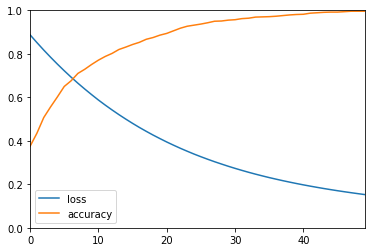

In [30]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=X, y=y, verbose=0, epochs=50)
plot_loss_accuracy(history)